# Cleaning the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Load the dataset
file_path = './Resources/U.S._Chronic_Disease_Indicators.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [5]:
# Drop columns with 0 non-null values
# Drop only the columns that exist in the dataset
columns_to_drop = [
    'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 
    'ResponseID', 'StratificationCategoryID2', 'StratificationID2','StratificationCategoryID3', 
    'StratificationID3', 'YearStart', 
    'DataValueFootnoteSymbol', 'DataValueFootnote', 'StratificationID1', 'StratificationCategoryID1'
    
]

# Filter columns_to_drop to include only existing columns
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the filtered list of columns
data.drop(columns=columns_to_drop, inplace=True)

print("Dropped unnecessary columns successfully!")


Dropped unnecessary columns successfully!


In [6]:
# Fill missing 'Geolocation' with 'Unknown'
data['Geolocation'].fillna('Unknown', inplace=True)

In [7]:
# Extract longitude and latitude into separate columns
data[['Longitude', 'Latitude']] = data['Geolocation'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')
#Rename Columns
data.rename(columns={'YearEnd': 'Year'}, inplace=True)
data.rename(columns={'LocationDesc': 'Location'}, inplace=True)
data.rename(columns={'DataValue': 'Value'}, inplace=True)

In [8]:
# Drop duplicate rows
data = data.drop_duplicates()

In [9]:
# List of stratification categories
StratificationCategory1 = ['Sex', 'Age', 'Race/Ethnicity', 'Grade', 'Overall']

# Pivot the data: Create separate columns for each StratificationCategory
for category in StratificationCategory1:
    # Assign values from Stratification1 where StratificationCategory1 matches the current category
    data[category] = data['Stratification1'].where(data['StratificationCategory1'] == category)

# Drop the original columns if no longer needed
data.drop(columns=['StratificationCategory1', 'Stratification1'], inplace=True)

# Fill missing values in the new columns with 'Unknown' (optional)
data[StratificationCategory1] = data[StratificationCategory1].fillna('Unknown')

In [10]:
#Drop 'Overall' Column
data.drop(columns=[ 'Overall','DataValueAlt'], inplace=True)

In [11]:
print(data.columns)

Index(['Year', 'LocationAbbr', 'Location', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'Value', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'Geolocation', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'Longitude', 'Latitude', 'Sex', 'Age',
       'Race/Ethnicity', 'Grade'],
      dtype='object')


In [12]:
# Define the new column order
new_column_order = ['Year','Sex', 'Age', 'Grade', 'Race/Ethnicity', 'DataSource',
                    'Location', 'LocationAbbr', 'LocationID','Geolocation', 'Longitude', 'Latitude', 
                    'Topic', 'TopicID', 'Question', 'QuestionID', 'Value', 'DataValueUnit',
                    'DataValueType', 'DataValueTypeID', 'LowConfidenceLimit', 'HighConfidenceLimit' ]
# Reorder the DataFrame
data_reordered = data[new_column_order]

# Columns sorted by data source type
data = data_reordered.sort_values(by=['DataSource'], ascending=[True])
data.reset_index(drop=True, inplace=True)

In [13]:
# Review the final data set
print(data)

        Year      Sex      Age     Grade  \
0       2019  Unknown  Unknown   Unknown   
1       2019     Male  Unknown   Unknown   
2       2021  Unknown  Unknown   Unknown   
3       2019  Unknown  Unknown   Unknown   
4       2021  Unknown  Unknown   Unknown   
...      ...      ...      ...       ...   
309210  2021  Unknown  Unknown   Unknown   
309211  2021  Unknown  Unknown   Unknown   
309212  2021  Unknown  Unknown  Grade 12   
309213  2019     Male  Unknown   Unknown   
309214  2019  Unknown  Unknown   Unknown   

                                        Race/Ethnicity DataSource  \
0                                             Hispanic        ACS   
1                                              Unknown        ACS   
2                                  Black, non-Hispanic        ACS   
3                                              Unknown        ACS   
4                                  Black, non-Hispanic        ACS   
...                                                ...   

In [14]:
# Save the dataset as a CSV file
file_path = './Resources/final2_cleaned_dataset.csv'
data.to_csv(file_path, index=False)  


# Creating a Database

In [15]:
# Step 2: Connect to a SQLite database (it creates the file if it doesn't exist)
sqlite_file = './Resources/U.S._Chronic_Disease_Indicators_2.sqlite'  # This is the SQLite file name
conn = sqlite3.connect(sqlite_file)  # This creates or opens the SQLite file

# Step 3: Write the DataFrame to the SQLite database
table_name = 'U.S._Chronic_Disease_Indicators'  # Name of the table in SQLite
data.to_sql(table_name, conn, if_exists='replace', index=False)

# Step 4: Verify the data has been written (optional)
query = f"SELECT * FROM `{table_name}` LIMIT 5;"  # Query to fetch the first 5 rows
result = pd.read_sql_query(query, conn)
print("Preview of the data written to the SQLite database:")
print(result)

# Step 5: Close the connection
conn.close()

print(f"Database '{sqlite_file}' has been created with table '{table_name}'.")


Preview of the data written to the SQLite database:
   Year      Sex      Age    Grade       Race/Ethnicity DataSource  \
0  2019  Unknown  Unknown  Unknown             Hispanic        ACS   
1  2019     Male  Unknown  Unknown              Unknown        ACS   
2  2021  Unknown  Unknown  Unknown  Black, non-Hispanic        ACS   
3  2019  Unknown  Unknown  Unknown              Unknown        ACS   
4  2021  Unknown  Unknown  Unknown  Black, non-Hispanic        ACS   

     Location LocationAbbr  LocationID  \
0  California           CA           6   
1    New York           NY          36   
2     Georgia           GA          13   
3        Utah           UT          49   
4      Nevada           NV          32   

                                      Geolocation  ...  \
0   POINT (-120.99999953799971 37.63864012300047)  ...   
1    POINT (-75.54397042699964 42.82700103200045)  ...   
2    POINT (-83.62758034599966 32.83968109300048)  ...   
3  POINT (-111.58713063499971 39.360700171

# Visualizations

## How does smoking affect the risk of developing chronic obstructive pulmonary disease (COPD)?

In [16]:
# Load the SQLite database
db_path = './Resources/U.S._Chronic_Disease_Indicators_2.sqlite'
conn = sqlite3.connect(db_path)

# Query the table with backticks to escape the period
query = "SELECT * FROM `U.S._Chronic_Disease_Indicators`"  # Wrap table name in backticks
df = pd.read_sql_query(query, conn)

In [17]:
# Function to map ages into desired age groups
def group_age(age):
    if isinstance(age, str):
        if age in ['Age 18-44', 'Age 0-44']:
            return '18-44'
        elif age == 'Age >=65':
            return '65+'
        elif age == 'Age 45-64':
            return '45-64'
        elif age in ['Age 1-5', 'Age 4 m - 5 y']:
            return '0-5'
        elif age in ['Age 12-17', 'Age 6-14', 'Age 6-11', 'Age 10-13', 'Age 6-9']:
            return '6-17'
        return 'Unknown'
    return 'Unknown'

# Apply the function to the 'Age' column
df['Age'] = df['Age'].apply(group_age)

In [18]:
# Filter rows based on relevant topics
filtered_data = df[df['Topic'].str.contains(
    'Tobacco|Health Status|Chronic Obstructive Pulmonary Disease|Social Determinants of Health',
    case=False, na=False
)]

# Filter for smoking-related and COPD-related questions
smoking_copd_data = filtered_data[filtered_data['Question'].str.contains(
    'smoking|COPD', case=False, na=False
)]


In [19]:
# Reword questions
reworded_questions = {
   'Current cigarette smoking among adults': 'Current Smoking Among Adults',
    'Current smoking among adults with chronic obstructive pulmonary disease': 'Smoking Among Adults with COPD',
    'Chronic obstructive pulmonary disease among adults': 'COPD Prevalence Among Adults',
    'Hospitalization for chronic obstructive pulmonary disease as any diagnosis, Medicare-beneficiaries aged 65 years and older': 'COPD Hospitalizations in Medicare Beneficiaries (65+)',  # Merged
    'Hospitalization for chronic obstructive pulmonary disease as principal diagnosis, Medicare-beneficiaries aged 65 years and older': 'COPD Hospitalizations in Medicare Beneficiaries (65+)',  # Merged
    'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying or contributing cause': 'COPD Mortality Among Adults (45+)',  # Merged
    'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying cause': 'COPD Mortality Among Adults (45+)'  # Merged
}

df['Reworded Question'] = df['Question'].replace(reworded_questions)

# Filter relevant data
smoking_copd_data = df[df['Reworded Question'].isin(reworded_questions.values())]

# Ensure 'Value' is numeric
smoking_copd_data.loc[:, 'Value'] = pd.to_numeric(smoking_copd_data['Value'], errors='coerce')



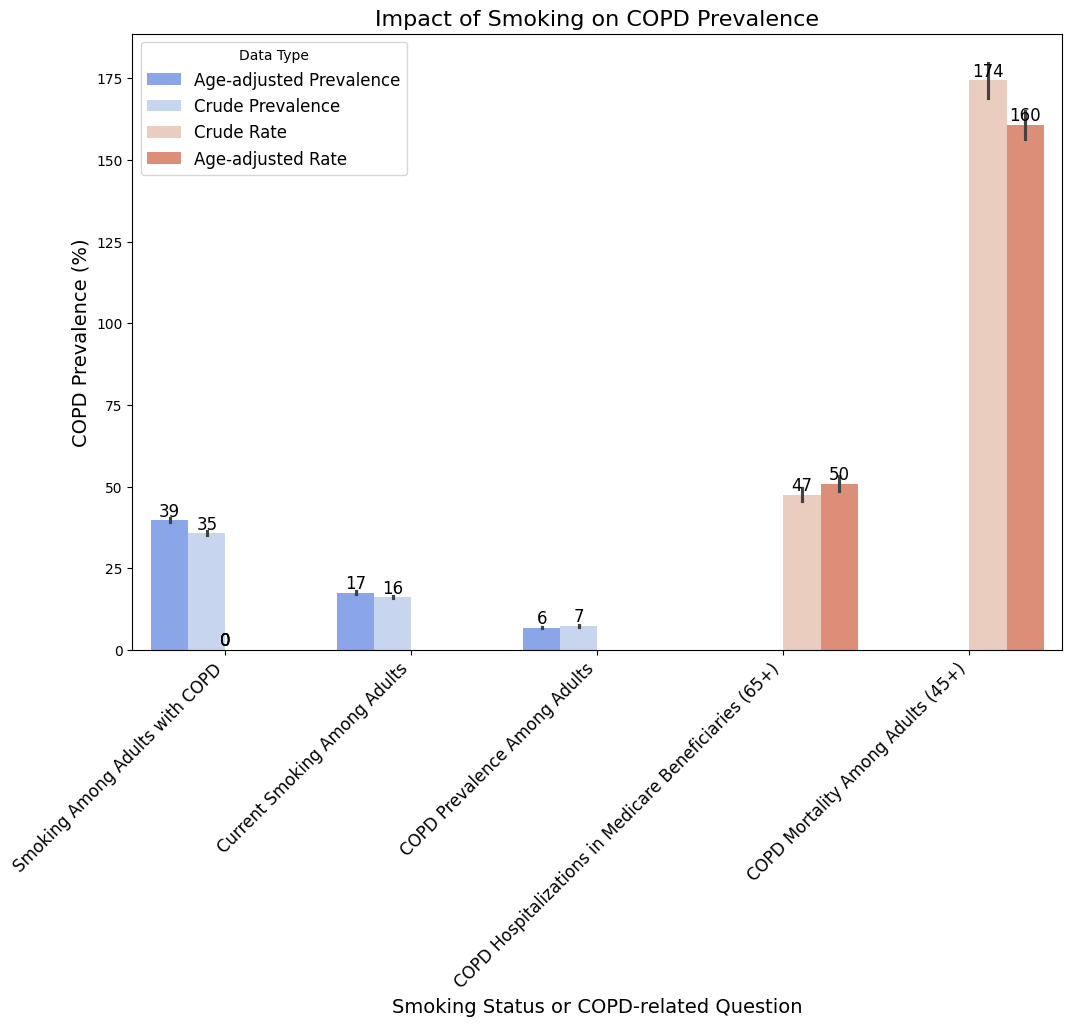

In [20]:
# Bar plot for smoking and COPD
plt.figure(figsize=(12, 8))
filtered_data = smoking_copd_data[~smoking_copd_data['DataValueType'].str.contains('Number', case=False, na=False)]
ax = sns.barplot(x='Reworded Question', y='Value', data=filtered_data, hue='DataValueType', palette='coolwarm')

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Set labels and save
plt.title('Impact of Smoking on COPD Prevalence', fontsize=16)
plt.xlabel('Smoking Status or COPD-related Question', fontsize=14)
plt.ylabel('COPD Prevalence (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.savefig('./Output/VM_BarChart.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

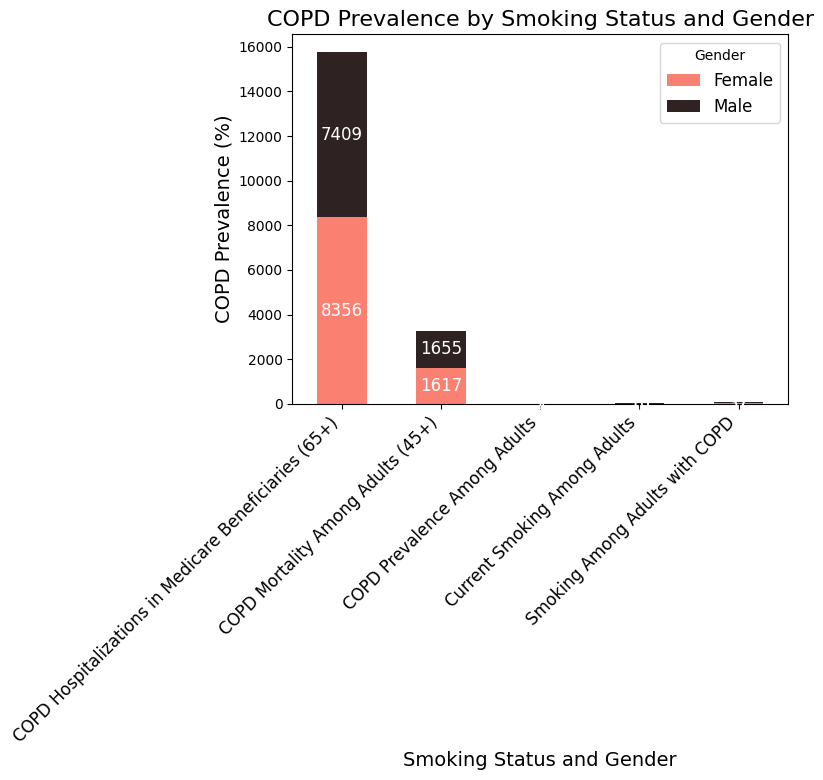

In [24]:
# Assuming you have your grouped data
# Filter data to exclude 'Unknown' sex
smoking_copd_data = smoking_copd_data[smoking_copd_data['Sex'] != 'Unknown']

# Group the data by 'Question' and 'Sex', and calculate the mean COPD prevalence for each group
grouped_data = smoking_copd_data.groupby(['Reworded Question', 'Sex'])['Value'].mean().reset_index()

# Create a pivot table to have questions on the x-axis and different sexes as columns
pivot_data = grouped_data.pivot_table(index='Reworded Question', columns='Sex', values='Value', aggfunc='mean', fill_value=0)

# Create the figure with transparent background
plt.figure(figsize=(12, 8), facecolor='none')

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, colormap=sns.color_palette("dark:salmon_r", as_cmap=True))

# Add numbers (whole numbers) above the bars with white lettering in the center of the bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Center the text horizontally
    y_position = p.get_y() + height / 2  # Center the text vertically (middle of the bar)

    # Add text above each bar with white color and centered in the middle
    ax.text(
        x_position,  # X position (center of the bar)
        y_position,  # Y position (middle of the bar)
        f'{int(height)}',  # Display the height as a whole number
        ha='center',  # Horizontal alignment (so text is centered)
        va='center',  # Vertical alignment (so text is centered)
        fontsize=12,  # Font size for the numbers
        color='white'  # Text color set to white
    )

# Set labels and save with transparent background
plt.title('COPD Prevalence by Smoking Status and Gender', fontsize=16)
plt.xlabel('Smoking Status and Gender', fontsize=14)
plt.ylabel('COPD Prevalence (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Gender', fontsize=12, loc='upper right')

# Save the plot as a PNG image with transparent background
plt.savefig('./Output/VM_Stacked_BarChart.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

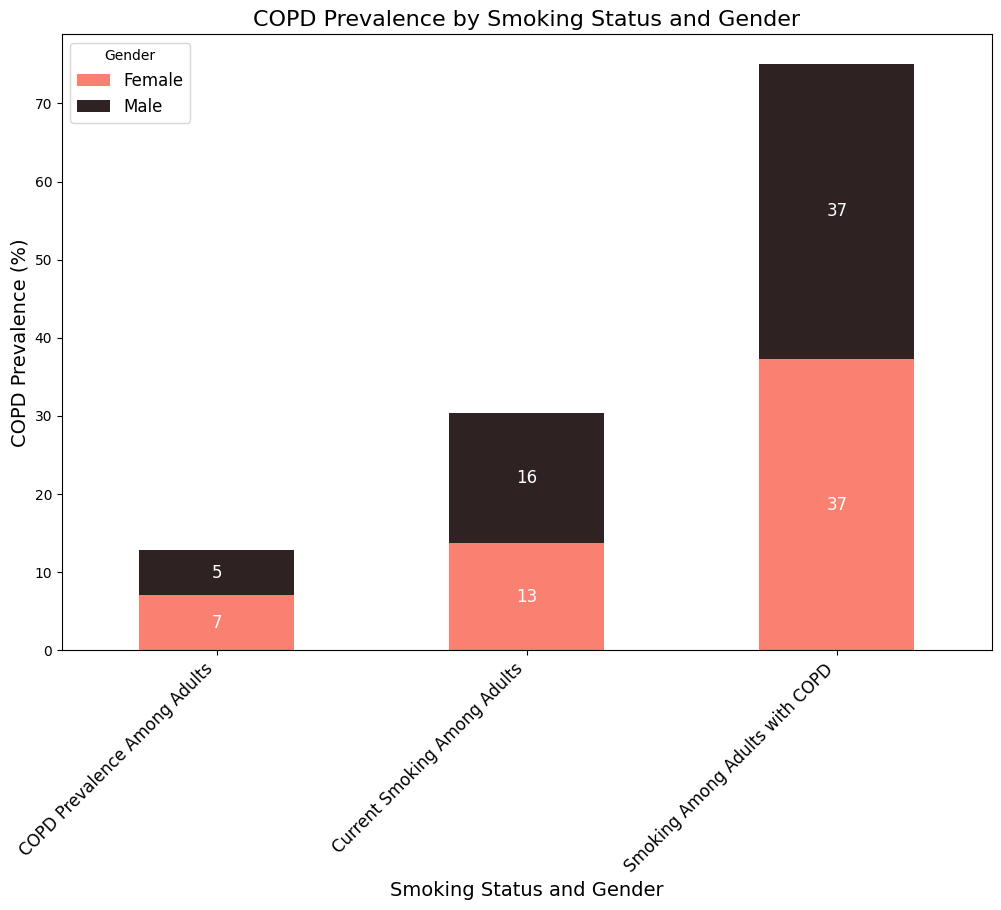

In [22]:
# Assuming 'smoking_copd_data' is your DataFrame with the necessary data
# Filter data to exclude 'Unknown' sex and only include relevant questions
smoking_copd_data = smoking_copd_data[smoking_copd_data['Sex'] != 'Unknown']

# Filter to include only specific questions
filtered_data = smoking_copd_data[smoking_copd_data['Reworded Question'].isin([
    'Current Smoking Among Adults',
    'Smoking Among Adults with COPD',
    'COPD Prevalence Among Adults'
])]

# Group the data by 'Reworded Question' and 'Sex', and calculate the mean COPD prevalence for each group
grouped_data = filtered_data.groupby(['Reworded Question', 'Sex'])['Value'].mean().reset_index()

# Create a pivot table to have questions on the x-axis and different sexes as columns
pivot_data = grouped_data.pivot_table(index='Reworded Question', columns='Sex', values='Value', aggfunc='mean', fill_value=0)

# Plotting the stacked bar chart with 'Question' on x-axis and 'Sex' in legend
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=sns.color_palette("dark:salmon_r", as_cmap=True))

# Add numbers (whole numbers) above the bars with white lettering in the center of the bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Center the text horizontally
    y_position = p.get_y() + height / 2  # Center the text vertically (middle of the bar)

    # Add text above each bar with white color and centered in the middle
    ax.text(
        x_position,  # X position (center of the bar)
        y_position,  # Y position (middle of the bar)
        f'{int(height)}',  # Display the height as a whole number
        ha='center',  # Horizontal alignment (so text is centered)
        va='center',  # Vertical alignment (so text is centered)
        fontsize=12,  # Font size for the numbers
        color='white'  # Text color set to white
    )

# Set labels and save with transparent background
plt.title('COPD Prevalence by Smoking Status and Gender', fontsize=16)
plt.xlabel('Smoking Status and Gender', fontsize=14)
plt.ylabel('COPD Prevalence (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Gender', fontsize=12, loc='upper left')

# Save the plot as a PNG image
plt.savefig('./Output/VM_Stacked_BarChart2.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()